<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-Problem-Set-4" data-toc-modified-id="EDA-Problem-Set-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA Problem Set 4</a></span><ul class="toc-item"><li><span><a href="#Convert-the-default-dataset-format-as-a-DataFrame." data-toc-modified-id="Convert-the-default-dataset-format-as-a-DataFrame.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convert the default dataset format as a DataFrame.</a></span></li><li><span><a href="#Present-a-pairplot-of-the-attributes-'mean-radius',-'mean-texture',-'mean-perimeter','mean-area','mean-smoothness'-and-discuss-the-results." data-toc-modified-id="Present-a-pairplot-of-the-attributes-'mean-radius',-'mean-texture',-'mean-perimeter','mean-area','mean-smoothness'-and-discuss-the-results.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Present a pairplot of the attributes 'mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness' and discuss the results.</a></span></li><li><span><a href="#Show-a-correlation-matrix-of-the-all-of-the-attributes-of-the-dataset.-What-does-the-correlation-matrix-tell-us?-Use-this-to-build-the-SVM-model-X-features." data-toc-modified-id="Show-a-correlation-matrix-of-the-all-of-the-attributes-of-the-dataset.-What-does-the-correlation-matrix-tell-us?-Use-this-to-build-the-SVM-model-X-features.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Show a correlation matrix of the all of the attributes of the dataset. What does the correlation matrix tell us? Use this to build the SVM model X features.</a></span></li><li><span><a href="#Build-an-SVM-to-classify-whether-the-reading-is-malignant-or-benign." data-toc-modified-id="Build-an-SVM-to-classify-whether-the-reading-is-malignant-or-benign.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build an SVM to classify whether the reading is malignant or benign.</a></span></li><li><span><a href="#Present-an-analysis-of-the-data-following-the-SVM-results-with-cross-validation-used." data-toc-modified-id="Present-an-analysis-of-the-data-following-the-SVM-results-with-cross-validation-used.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Present an analysis of the data following the SVM results with cross-validation used.</a></span></li><li><span><a href="#Run-a-different-binary-classifier-(whether-we-discussed-it-in-class-or-not)-and-compare-the-results.-Which-one-was-better-and-why?-Make-sure-the-comparison-is-sound-and-that-any-normalization/scaling/validations-are-done-the-same-way." data-toc-modified-id="Run-a-different-binary-classifier-(whether-we-discussed-it-in-class-or-not)-and-compare-the-results.-Which-one-was-better-and-why?-Make-sure-the-comparison-is-sound-and-that-any-normalization/scaling/validations-are-done-the-same-way.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Run a different binary classifier (whether we discussed it in class or not) and compare the results. Which one was better and why? Make sure the comparison is sound and that any normalization/scaling/validations are done the same way.</a></span></li></ul></li></ul></div>

# EDA Problem Set 4
**Submitted by: Rosiel Jazmine T. Villareal**

>Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.

The dataset below is a sample of UCI's breast cancer dataset. It includes columns that describe readings of breast cancer scans and their tags on whether they were classified as malignant or not. Build a model that can automatically classify using the columns available.

Using the lessons on SVMs, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. Convert the default dataset format as a DataFrame ( 1pt )
[Answer to Question 1](#question_1)

2. Present a pairplot of the attributes 'mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness' and discuss the results. ( 3pts )
[Answer to Question 2](#question_2)

3. Show a correlation matrix of the all of the attributes of the dataset. What does the correlation matrix tell us?Use this to build the SVM model X features ( 4pts )
[Answer to Question 3](#question_3)

4. Build an SVM to classify whether the reading is malignant or benign ( 5pts )
[Answer to Question 4](#question_4)

5. Present an analysis of the data following the SVM results with cross-validation used ( 3pts ) [Answer to Question 5](#question_5)

 - what is the accuracy
 - present a confusion matrix and discuss the findings

6. Run a different binary classifier (whether we discussed it in class or not) and compare the results. Which one was better and why? Make sure the comparison is sound and that any normalization/scaling/validations are done the same way (4pts)
[Answer to Question 6](#question_6)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer, classification_report, plot_confusion_matrix 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings("ignore")

from sklearn import datasets

cancer_dataset = datasets.load_breast_cancer()

In [2]:
pd.set_option("display.max_columns", 240)

In [3]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<a id="question_1"></a>

## Convert the default dataset format as a DataFrame.

In [4]:
df = pd.DataFrame(cancer_dataset.data,
                  columns=cancer_dataset.feature_names)
df['target'] = pd.Series(cancer_dataset.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<a id="question_2"></a>

## Present a pairplot of the attributes 'mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness' and discuss the results.

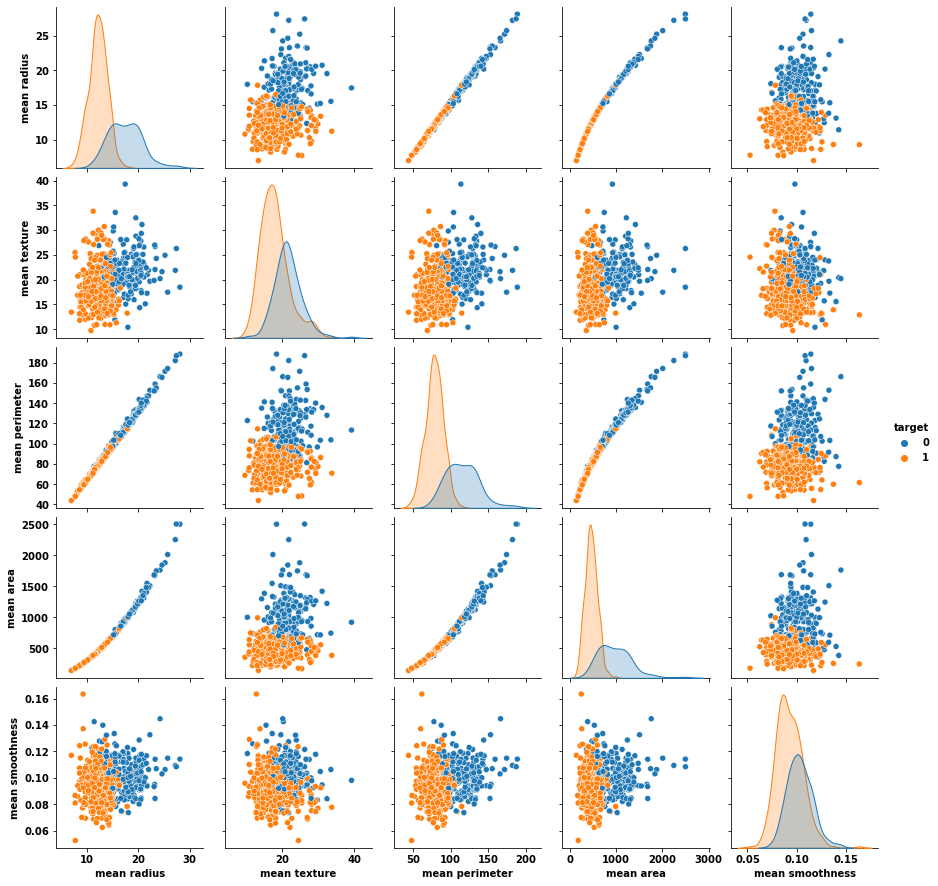

In [5]:
attrs = ['mean radius', 'mean texture', 'mean perimeter',
        'mean area', 'mean smoothness']

pp = sns.pairplot(df, hue='target',
                 x_vars=attrs, y_vars=attrs)

1. Looking at the ff. pairs of the features, it seems like the observations are somehow linearly separable but not perfectly as there are some overlaps. But the malignant cases (orange/1) and benign cases (blue/0) do seem to be clustered well within their classes, i.e., malignant observations are close to one another & benign cases are close to one another as well.
- mean radius vs. mean smoothness
- mean texture vs. mean smmothness
- mean perimeter vs. mean smoothness
- mean area vs. mean smoothness
- mean texture vs. mean area
- mean texture vs. mean perimeter
- mean radius vs. mean texture

2. The observations for the ff. pairs of features look like lines because the features are highly correlated. Again, the observations don't look like they could be perfectly separated using a line. Thus, it might be good to try non-linear kernels (like rbf or polynomial) as well.
- mean radius vs. mean area
- mean perimeter vs. mean area
- mean radius vs. mean perimeter

<a id="question_3"></a>

## Show a correlation matrix of the all of the attributes of the dataset. What does the correlation matrix tell us? Use this to build the SVM model X features.

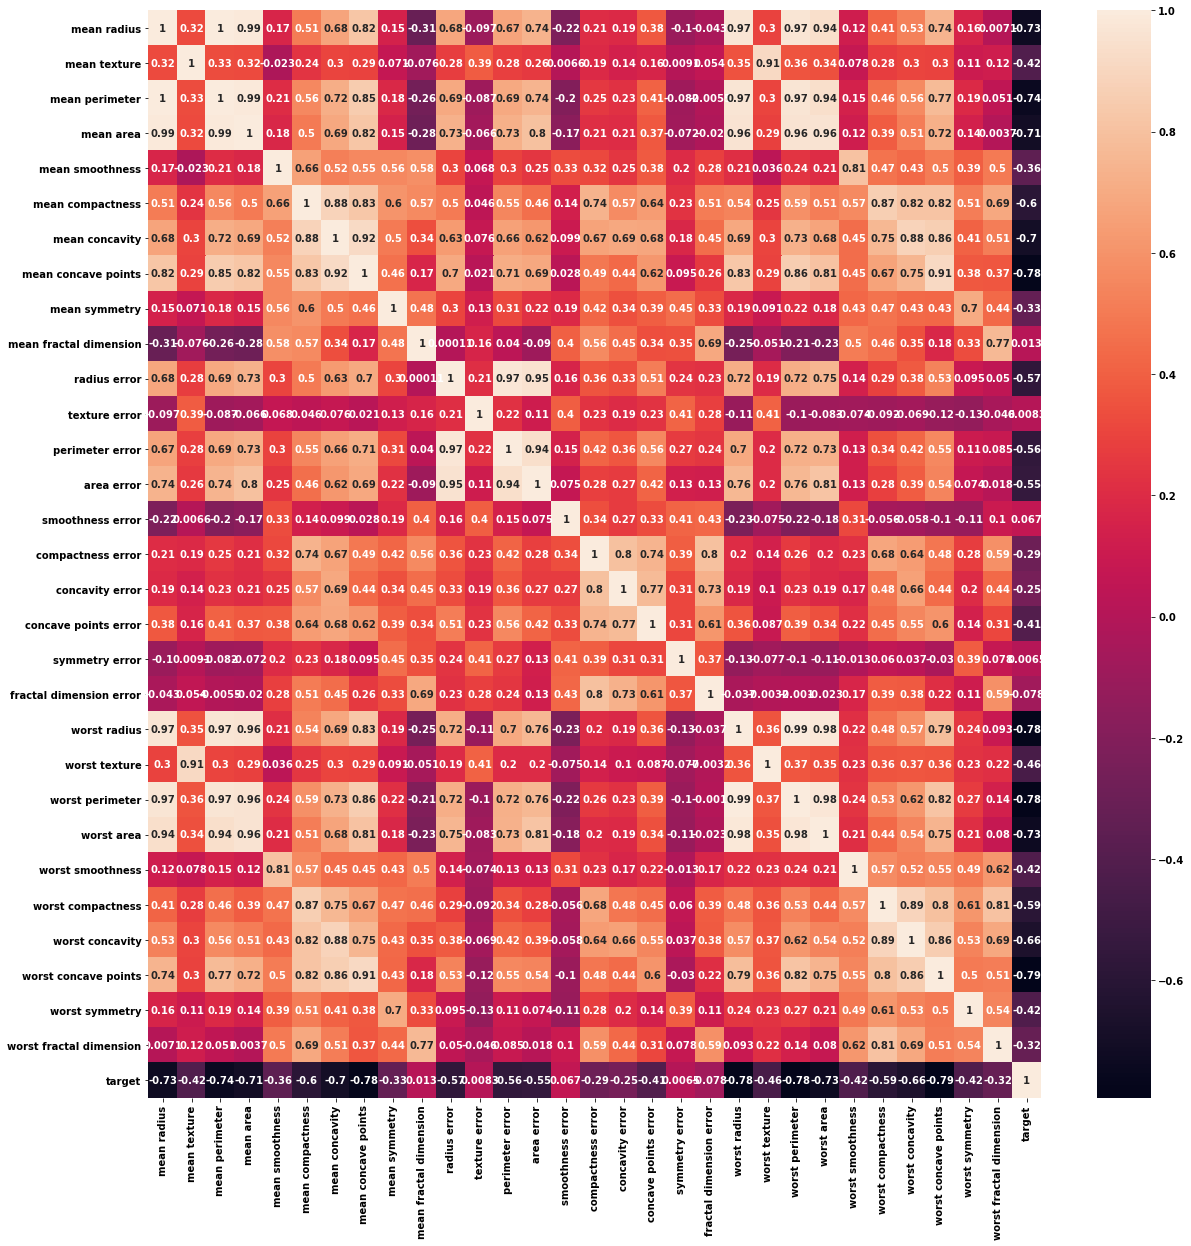

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True)

Based on the heatmap, there are some highly correlated features like: (a) mean radius, mean perimeter, mean area, worst radius, worst perimeter, worst perimeter, worst area; and (b) means and their corresponding worst values for each feature. We can choose to keep only some of the features and drop those that are highly correlated with the features that are kept so that feature importances are not distorted.

Aside from looking at the correlation matrix, we can also create histogram plots to show the feature distribution per class (0 or 1).

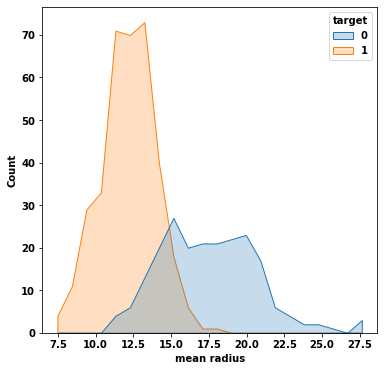

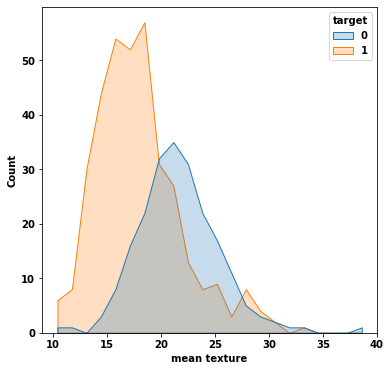

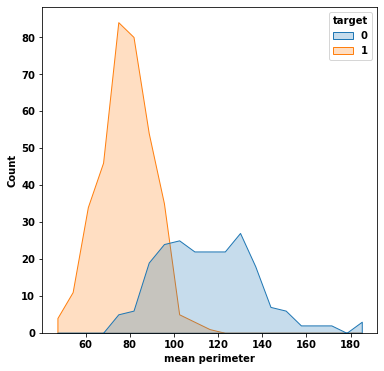

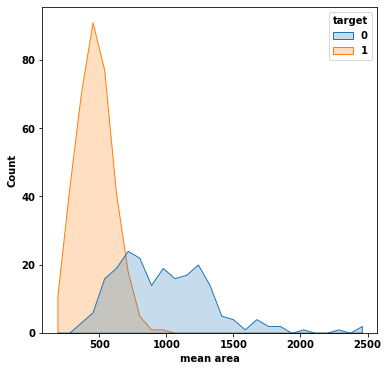

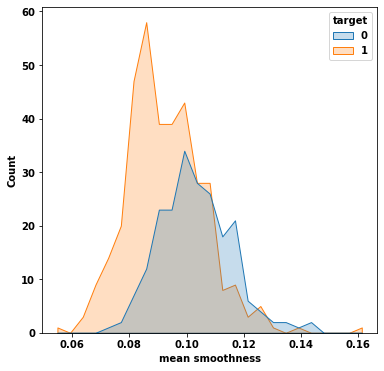

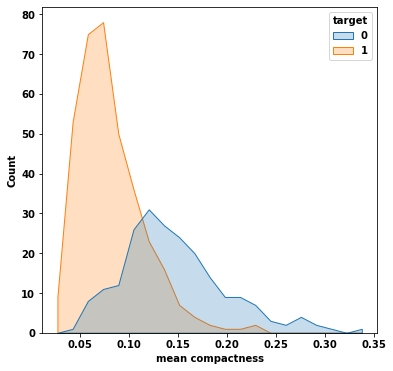

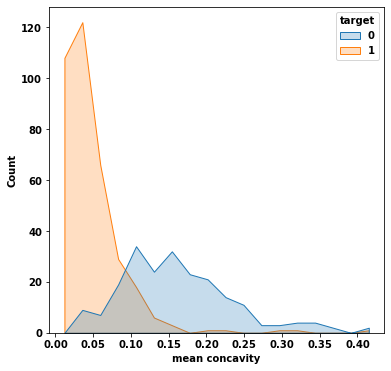

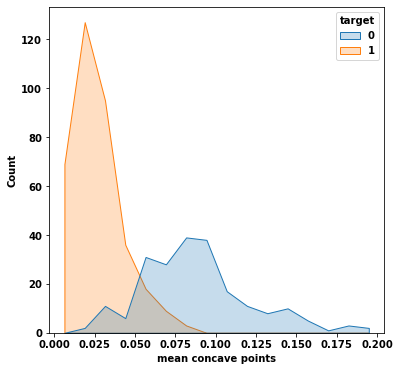

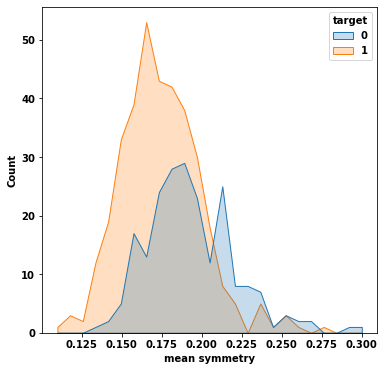

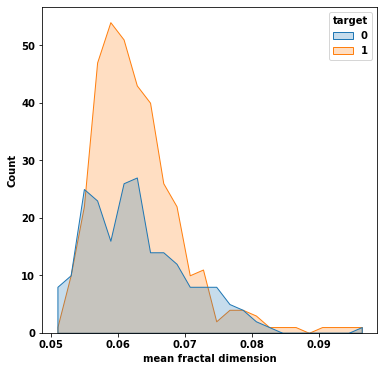

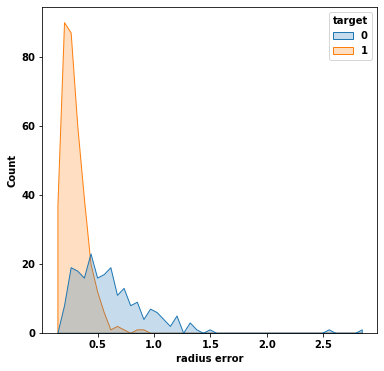

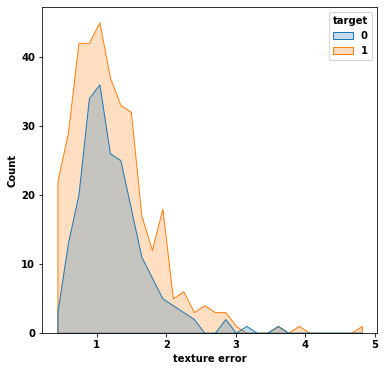

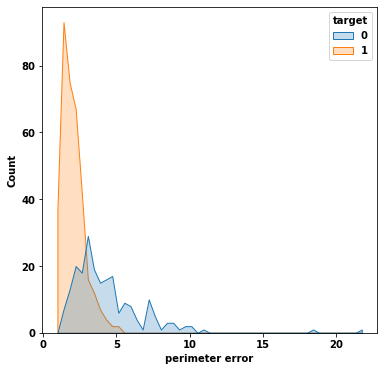

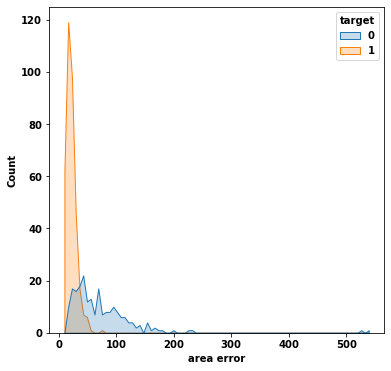

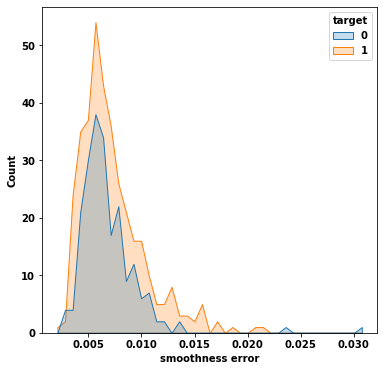

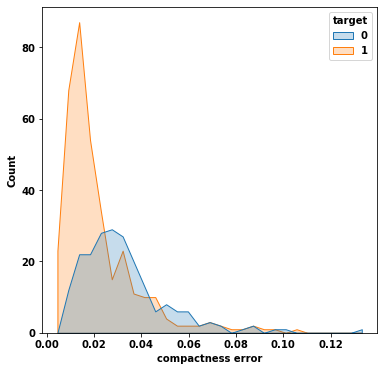

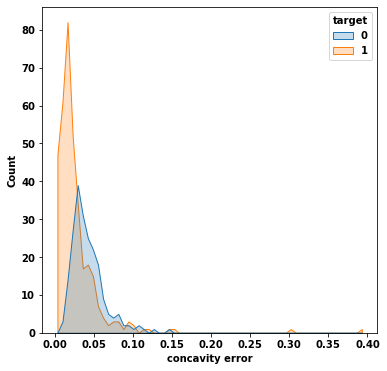

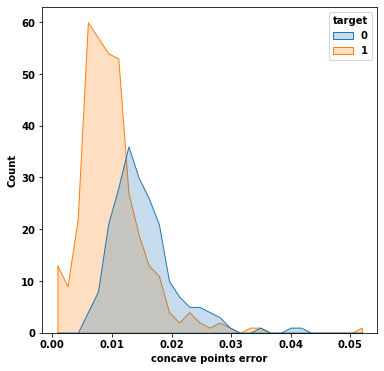

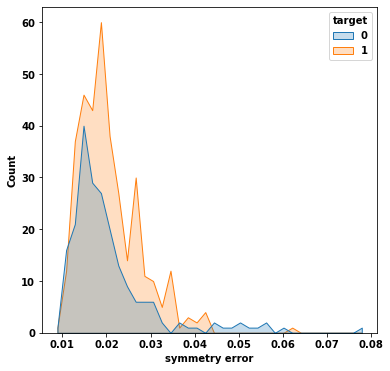

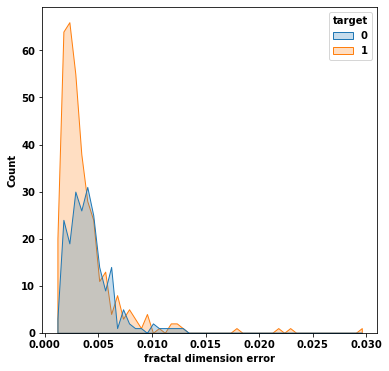

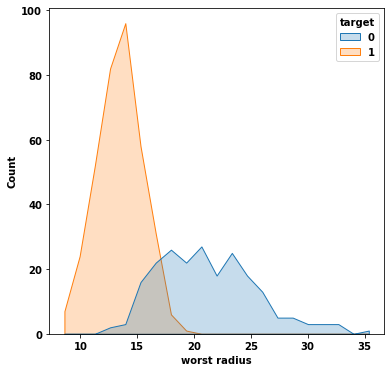

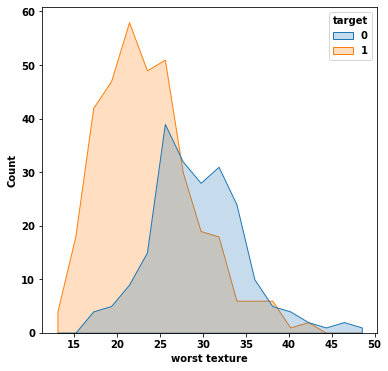

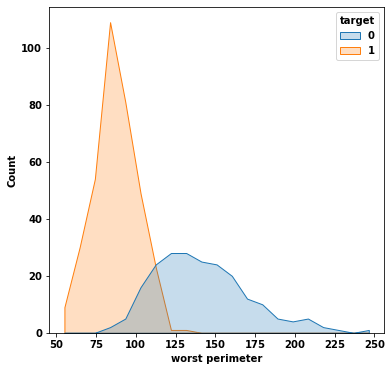

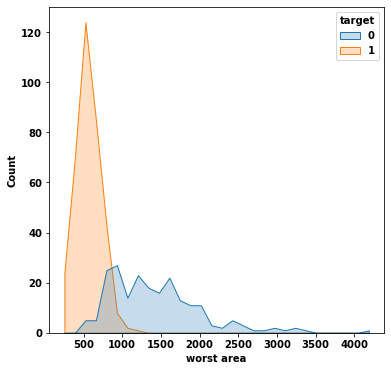

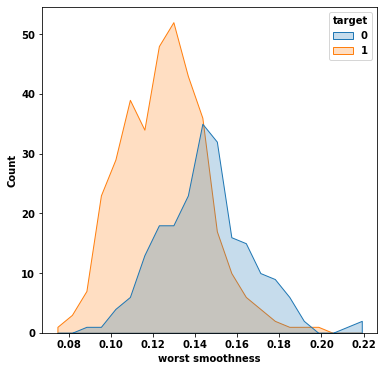

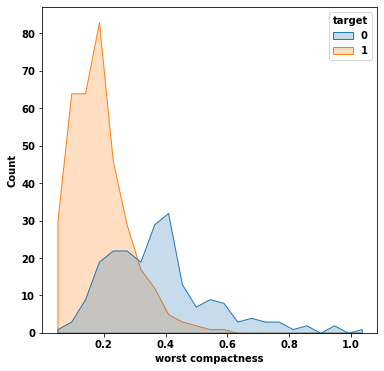

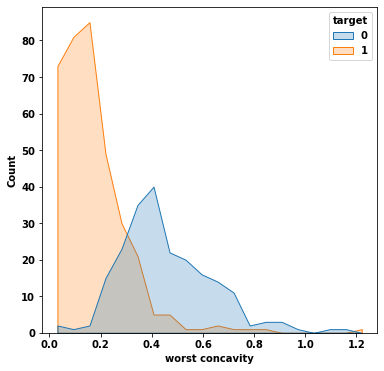

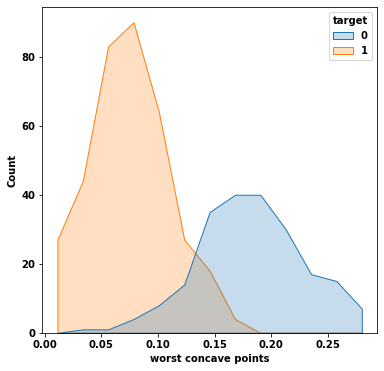

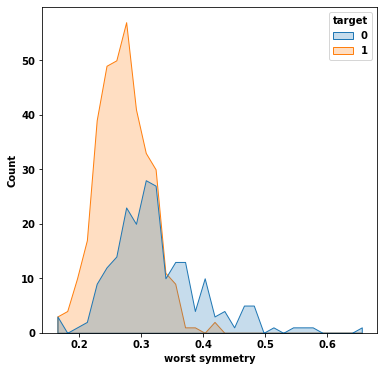

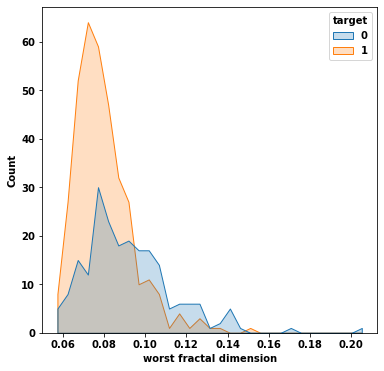

<Figure size 432x432 with 0 Axes>

In [7]:
# Feature histplots

for feat in df.columns:
    plt.figure(feat, figsize=(6,6))
    plt.tight_layout()
    if feat != 'target':
        ax = sns.histplot(x=df[feat], hue=df['target'], element='poly')

The distributions for the malignant (1) and benign classes (0) seem to be distinct for some features. Specifically, the distributions for the malignant class are taller and narrower while those for the benign class are shorter and wider for features like ``mean concavity``, ``mean concave points``, and ``mean area``.

In [8]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<a id="question_4"></a>

## Build an SVM to classify whether the reading is malignant or benign.

Reference:
- SVM guide: https://scikit-learn.org/stable/modules/svm.html

- I decided to keep only one of a pair/group of correlated features (dropped worst values and kept mean values only, dropped mean radius & mean perimeter and kept mean area only)
- I scaled all the features so that the importances of features to the prediction are not based on their magnitude.

In [9]:
drop_cols = ['mean radius', 'mean perimeter', 'worst radius', 'worst perimeter', 'worst area',
            'worst texture', 'worst smoothness', 'worst compactness', 'worst concavity',
             'worst concave points', 'worst symmetry', 'worst fractal dimension',
            'target']

# Set predictor variables
X = df.drop(drop_cols, axis=1)

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Set target variable
y = df['target']

print(f'Features used: {X.columns}')

Features used: Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error'],
      dtype='object')


Then, I split the dataset into 70% training and 30% test set. The training set was used for finding the best parameters and comparing different classifiers (SVM vs. LR vs. NB). Meanwhile, the test set was used for getting the final evaluation metrics.

In [10]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.30,
                                                   random_state=18)  

I ran cross-validated grid search to find the best parameters (kernel, regularization parameter C, and class weight) for SVM using the f1-score for the malignant class as scoring function. I chose that scoring function instead of a weighted one because I think that detecting malignant cases is more important than detecting benign cases. It's also possible to use recall for the malignant class as scoring function, but I just chose f1-score for a more balanced view that integrates precision as well.

In [11]:
# Run grid search to tune parameters
param_grid = {
    'kernel': ('linear', 'poly', 'rbf'),
    'C': [1, 10],
    'class_weight': ['balanced', None]
}

svm = SVC()
clf = GridSearchCV(svm, param_grid,
                  scoring=make_scorer(f1_score))
clf.fit(X_train, y_train)
best_svm = clf.best_estimator_
print(f'Best SVM params: {clf.best_params_}')
print(f'Best mean cross-validated score: {clf.best_score_}')

Best SVM params: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Best mean cross-validated score: 0.969073892355144


In [12]:
test_df = pd.DataFrame(data=X_test,
                       index=y_test.index,
                       columns=X.columns)
preds = best_svm.predict(X_test)
test_df['actual_class'] = y_test
test_df['predicted_class'] = preds
test_df

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,actual_class,predicted_class
232,3.378983,-0.762473,-1.320851,-1.300090,-1.052512,-1.095861,0.121873,-0.640418,-0.654249,0.780434,-0.681686,-0.547338,-0.894029,-1.043186,-0.950636,-1.358853,-0.167367,-0.476939,1,1
490,0.733108,-0.535798,-1.027649,-0.991939,-0.899681,-0.936557,-0.977060,-0.430613,-0.654249,-0.141253,-0.638124,-0.490574,-0.648353,-0.750492,-0.745493,-1.175231,-0.540288,-0.528003,1,1
543,2.040920,-0.331307,-0.686767,-0.674123,-0.739856,-0.417067,-0.670381,-0.707046,-0.613826,0.689717,-0.656935,-0.494754,-0.689354,-0.657157,-0.560808,-0.434582,-0.399837,-0.927436,1,1
160,0.207191,-0.668618,0.892395,0.184948,-0.255736,-0.297641,0.662213,0.245584,0.348751,0.863894,0.524703,-0.043939,0.797373,-0.079818,0.324152,-0.044792,1.625806,0.478903,1,1
8,0.588830,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.616755,-1.111729,-0.281835,-0.915186,-0.613176,-0.931141,-0.436721,0.419950,-0.374896,1.201362,-0.368827,-0.494534,1.299726,-0.398947,0.267454,0.166080,2.064110,0.313228,1,1
406,-1.030809,0.412710,-0.100363,-0.366351,-0.424349,-0.093868,-0.279730,-0.573791,-0.600833,-1.051691,-0.562879,-0.407187,-1.027701,-0.727578,-0.450396,-0.494600,-0.671053,-0.822282,1,1
39,0.356123,-0.272150,0.372887,0.400995,0.219721,0.141115,-0.334494,0.197386,-0.693589,-1.134788,-0.653965,-0.480013,-0.558016,-0.172595,-0.046543,0.133639,-0.819980,-0.229940,0,0
452,2.080480,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,-0.772270,0.885666,-0.668321,-0.582541,0.097678,0.023019,-0.082353,-0.426634,-0.374411,0.191810,1,1


<a id="question_5"></a>

## Present an analysis of the data following the SVM results with cross-validation used.
 - what is the accuracy
 - present a confusion matrix and discuss the findings

In [13]:
def test_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)

**SVM: Evaluation metrics on test set**

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        70
           1       0.96      0.98      0.97       101

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



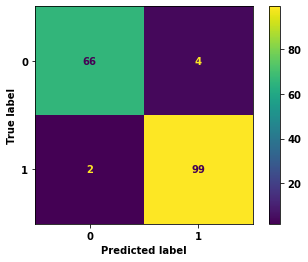

In [14]:
test_model(best_svm, X_test, y_test)

In [15]:
acc = accuracy_score(y_test, best_svm.predict(X_test))
print(f'The SVM model has an overall accuracy of: {np.round(acc*100,2)}%')
prec = precision_score(y_test, best_svm.predict(X_test))
print(f'Malignant class precision of: {np.round(prec*100,2)}%')
print(f'i.e. {np.round(100*(1-prec),2)}% of those predicted to be malignant were false positives')
rec = recall_score(y_test, best_svm.predict(X_test))
print(f'Malignant class recall of: {np.round(rec*100,2)}%')
print(f'i.e. {np.round(100*(1-rec),2)}% of malignant cases were wrongly predicted to be benign')

The SVM model has an overall accuracy of: 96.49%
Malignant class precision of: 96.12%
i.e. 3.88% of those predicted to be malignant were false positives
Malignant class recall of: 98.02%
i.e. 1.98% of malignant cases were wrongly predicted to be benign


<a id="question_6"></a>

## Run a different binary classifier (whether we discussed it in class or not) and compare the results. Which one was better and why? Make sure the comparison is sound and that any normalization/scaling/validations are done the same way.

References:
- Stratified k-fold CV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
- Common pitfalls: https://scikit-learn.org/stable/common_pitfalls.html
> For comparable fold-to-fold results in all scenarios, one should pass an integer to the CV splitter: ``cv = KFold(shuffle=True, random_state=0)``.

Similar to **1.4**, I used the **f1-score for the positive class** as the scoring function. Thus, the given mean cross-validated score for each classifier is not overall accuracy, but rather f1-score for the malignant class.

In [16]:
n_splits = 5
C = 10
class_weight = 'balanced'

svm = SVC(kernel='rbf', C=C, class_weight=class_weight) 
gaussian_nb = GaussianNB()
log_reg = LogisticRegression(C=C, class_weight=class_weight)

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=18)
    
for est in (svm, gaussian_nb, log_reg):
    
    print(f'classifier: {str(est)}')
    cross_val_scores = cross_val_score(est, X_train, y_train,
                                       cv=cv,
                                      scoring=make_scorer(f1_score))
    print(f'Mean cross-validated score across {n_splits} splits (mean +/- std): ' +
          f'{cross_val_scores.mean()*100} +/- {cross_val_scores.std()*100}%')
    print('\n')

classifier: SVC(C=10, class_weight='balanced')
Mean cross-validated score across 5 splits (mean +/- std): 96.51509810321691 +/- 0.9339693861867026%


classifier: GaussianNB()
Mean cross-validated score across 5 splits (mean +/- std): 93.75916390097873 +/- 1.625142016276797%


classifier: LogisticRegression(C=10, class_weight='balanced')
Mean cross-validated score across 5 splits (mean +/- std): 95.22576486905443 +/- 2.054126296325156%




The **SVM** has the highest cross-validated recall for the positive class (malignant / 1), followed by **logistic regression** and then by **Gaussian Naive Bayes**.

**LOGISTIC REGRESSION: Evaluation metrics on test set**

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.97      0.97      0.97       101

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



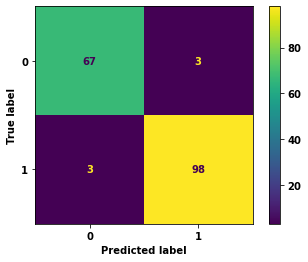

In [17]:
log_reg = LogisticRegression(C=C, class_weight='balanced')
log_reg.fit(X_train, y_train)
test_model(log_reg, X_test, y_test)

In [18]:
acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f'The logistic regression model has an overall accuracy of: {np.round(acc*100,2)}%')
prec = precision_score(y_test, log_reg.predict(X_test))
print(f'Malignant class precision of: {np.round(prec*100,2)}%')
print(f'i.e. {np.round(100*(1-prec),2)}% of those predicted to be malignant were false positives')
rec = recall_score(y_test, log_reg.predict(X_test))
print(f'Malignant class recall of: {np.round(rec*100,2)}%')
print(f'i.e. {np.round(100*(1-rec),2)}% of malignant cases were wrongly predicted to be benign')

The logistic regression model has an overall accuracy of: 96.49%
Malignant class precision of: 97.03%
i.e. 2.97% of those predicted to be malignant were false positives
Malignant class recall of: 97.03%
i.e. 2.97% of malignant cases were wrongly predicted to be benign


**Comparison of results on the test set for the MALIGNANT CLASS (1)**

|   Metric  |     SVM (%)   | Logistic Regression (%)|
|:---------:|:-------------:|:----------------------:|
| Precision |       96      |           97           |
| Recall    |       98      |           97           |
| F1-score  |       97      |           97           |

**Comparison of results on the test set for the BENIGN CLASS (0)**

|   Metric  |     SVM (%)   | Logistic Regression (%)|
|:---------:|:-------------:|:----------------------:|
| Precision |       97      |           96           |
| Recall    |       94      |           96           |
| F1-score  |       96      |           96           |

- For the ***malignant class***, the **logistic regresssion** model has higher precision, but the **SVM** model has higher recall.
- Meanwhile, for the ***benign class***, the **logistic regression** model has higher recall, but the **SVM** model has higher precision.
- The two models have the same overall accuracies.

**Which one [model] was better and why?**
- If the recall for malignant cases is used as the metric, then SVM is the better model. Having a high recall for the malignant class is more important than having a high recall for the benign class. If more benign cases are predicted to be malignant (i.e. low recall for benign class), then more diagnostic tests can be requested for those cases. However, if more malignant cases are predicted to be benign (i.e. low recall for malignant class), then that could create a false sense of security for patients. It's possible that those patients would receive proper diagnosis and treatment only at a later and more advanced stage of cancer.

**Feature coefficients used by logistic regression**

In [19]:
pd.DataFrame({'feature': X.columns,
              'coeffs': log_reg.coef_.flatten()}).sort_values(
    ascending=False, by='coeffs')

,feature,coeffs
17,fractal dimension error,1.507971
3,mean compactness,1.074063
13,compactness error,0.995001
10,perimeter error,0.953501
14,concavity error,0.609519
9,texture error,0.593899
16,symmetry error,0.531979
15,concave points error,-0.081622
2,mean smoothness,-0.124125
12,smoothness error,-0.211090


**Support vectors**

In [20]:
best_svm.support_vectors_.shape

(93, 18)

In [21]:
best_svm.support_

array([ 39,  40,  41,  48,  58,  93,  94, 108, 115, 117, 123, 133, 134,
       149, 164, 177, 178, 181, 188, 193, 194, 225, 246, 247, 258, 260,
       281, 286, 290, 295, 308, 309, 311, 315, 319, 332, 338, 356, 358,
       380, 381,   0,  20,  38,  52,  54,  79,  88,  96,  99, 104, 112,
       113, 119, 136, 144, 150, 156, 159, 171, 184, 190, 200, 201, 214,
       231, 233, 236, 240, 254, 262, 266, 267, 268, 272, 278, 287, 288,
       293, 301, 302, 320, 333, 343, 345, 346, 371, 386, 387, 391, 393,
       396, 397])

In [22]:
# Support vectors & predictions
sv = df.iloc[best_svm.support_]
preds = best_svm.predict(X_train[best_svm.support_])
sv['predicted_class'] = preds
sv

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,predicted_class
39,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.022390,0.030490,0.012620,0.01377,0.003187,15.53,26.02,107.30,740.4,0.16100,0.42250,0.503000,0.22580,0.2807,0.10710,0,0
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,0.1784,0.05587,0.2385,0.8265,1.572,20.53,0.003280,0.011020,0.013900,0.006881,0.01380,0.001286,15.93,30.25,102.50,787.9,0.10940,0.20430,0.208500,0.11120,0.2994,0.07146,0,0
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.056690,0.1895,0.06870,0.2366,1.4280,1.822,16.97,0.008064,0.017640,0.025950,0.010370,0.01357,0.003040,12.84,35.34,87.22,514.0,0.19090,0.26980,0.402300,0.14240,0.2964,0.09606,0,0
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.014270,0.023220,0.005660,0.01428,0.002422,13.76,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1,0
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.020450,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.014150,0.019880,0.007016,0.01647,0.001970,15.51,19.97,99.66,745.3,0.08484,0.12330,0.109100,0.04537,0.2542,0.06623,1,1
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.000000,0.000000,0.1985,0.07098,0.5169,2.0790,3.167,28.85,0.015820,0.019660,0.000000,0.000000,0.01865,0.006736,10.17,22.80,64.01,317.0,0.14600,0.13100,0.000000,0.00000,0.2445,0.08865,1,1
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.037260,0.047180,0.012880,0.02045,0.004028,26.23,28.74,172.00,2081.0,0.15020,0.57170,0.705300,0.24220,0.3828,0.10070,0,1
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.085800,0.053810,0.1806,0.06079,0.2136,1.3320,1.513,19.29,0.005442,0.019570,0.033040,0.013670,0.01315,0.002464,14.80,27.20,97.33,675.2,0.14280,0.25700,0.343800,0.14530,0.2666,0.07686,1,1


In [23]:
# Misclassified support vectors
sv.loc[sv['target']!=sv['predicted_class']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,predicted_class
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.014270,0.023220,0.005660,0.014280,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1,0
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.021900,0.002990,14.230,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1,0
93,13.450,18.30,86.60,555.1,0.10220,0.08165,0.039740,0.027800,0.1638,0.05710,0.2950,1.3730,2.099,25.22,0.005884,0.014910,0.018720,0.009366,0.018840,0.001817,15.100,25.94,97.59,699.4,0.13390,0.17510,0.138100,0.07911,0.2678,0.06603,1,0
115,11.930,21.53,76.53,438.6,0.09768,0.07849,0.033280,0.020080,0.1688,0.06194,0.3118,0.9227,2.000,24.79,0.007803,0.025070,0.018350,0.007711,0.012780,0.003856,13.670,26.15,87.54,583.0,0.15000,0.23990,0.150300,0.07247,0.2438,0.08541,1,0
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,0.2929,0.8570,1.928,24.19,0.003818,0.012760,0.028820,0.012000,0.019100,0.002808,15.700,15.98,102.80,745.5,0.13130,0.17880,0.256000,0.12210,0.2889,0.08006,1,0
133,15.710,13.93,102.00,761.7,0.09462,0.09462,0.071350,0.059330,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.015150,0.016780,0.012680,0.016690,0.002330,17.500,19.25,114.30,922.8,0.12230,0.19490,0.170900,0.13740,0.2723,0.07071,1,0
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,0.1859,1.9260,1.011,14.47,0.007831,0.008776,0.015560,0.006240,0.031390,0.001988,12.570,26.48,79.57,489.5,0.13560,0.10000,0.088030,0.04306,0.3200,0.06576,1,0
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,0.2796,0.9622,3.591,25.20,0.008081,0.051220,0.055510,0.018830,0.025450,0.004312,16.080,27.78,118.60,784.7,0.13160,0.46480,0.458900,0.17270,0.3000,0.08701,0,1
225,14.340,13.47,92.51,641.2,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,0.5220,0.8121,3.763,48.29,0.007089,0.014280,0.023600,0.012860,0.022660,0.001463,16.770,16.90,110.40,873.2,0.12970,0.15250,0.163200,0.10870,0.3062,0.06072,1,0
246,13.200,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.015690,0.030790,0.005383,0.019620,0.002250,13.940,27.82,88.28,602.0,0.11010,0.15080,0.229800,0.04970,0.2767,0.07198,1,0


When we use a non-linear kernel like rbf for SVM, we won't have feature coefficients like those in logistic regression since we're projecting the data to a different feature space. But we can still try to assess the importance of features to the model by using a technique like permutation. 
> __[Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html)__ is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled.

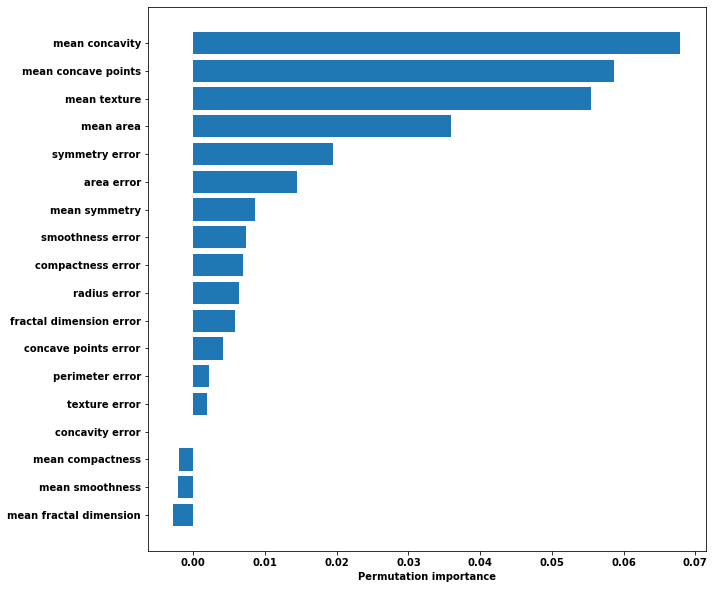

In [24]:
# Code snippet ref: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
perm_imp = permutation_importance(best_svm, X_test, y_test,
                                 scoring=make_scorer(f1_score))
feat_names = X.columns

sorted_idx = perm_imp.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.barh(feat_names[sorted_idx], perm_imp.importances_mean[sorted_idx])
ax = plt.xlabel('Permutation importance')

For example, in the plot above, if ``mean concavity`` has a feature importance of around 0.06-0.07, it means that when the values for that feature column were randomly shuffled, the f1-score for the malignant class decreased by around 0.06-0.07.